In [508]:
# Import Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import ML Libaries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, accuracy_score

data = sns.load_dataset('iris')
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [509]:
class LinearRegressionClassifier:
    
    def __init__(self):
        self.slope = 0
        self.bias = 0
        self.current_loss_avg_by_step = []
        
    def fit(self, x_train, y_train, use_l2_reg=False, epochs=100, batch_size=32, learning_rate=0.001, l2_lambda=0.001):
        if (len(x_train) < batch_size):
            raise ValueError('Invalid! input size has to atleast be batch_size')
            
        slope = self.slope
        bias = self.bias
        current_loss_avg_by_step = []
            
        for epoch in range(1, epochs + 1):
            y_pred = slope * x_train + bias
            partial_dloss_slope = (2/batch_size) * sum(x_train * (y_pred - y_train))
            partial_dbias_slope = (2/batch_size) * sum(y_pred - y_train)
            current_loss_avg = (1/batch_size)*sum((y_pred - y_train)**2)
            
            if use_l2_reg:
                partial_dloss_slope += 2 * l2_lambda * slope * batch_size
                current_loss_avg += l2_lambda * (slope**2) * batch_size
            
            current_loss_avg_by_step.append((epoch, current_loss_avg))
            slope = slope - learning_rate * partial_dloss_slope
            bias = bias - learning_rate * partial_dbias_slope
        
        self.slope = slope
        self.bias = bias
        self.current_loss_avg_by_step = pd.DataFrame(current_loss_avg_by_step)
            
    def predict(self, x_test):
        return self.slope * x_test + self.bias
            

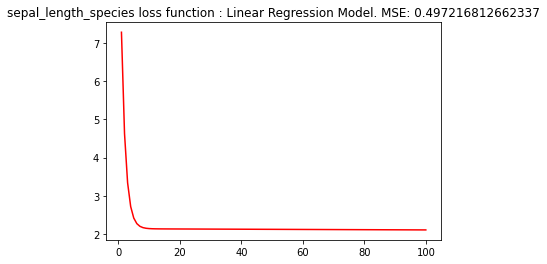

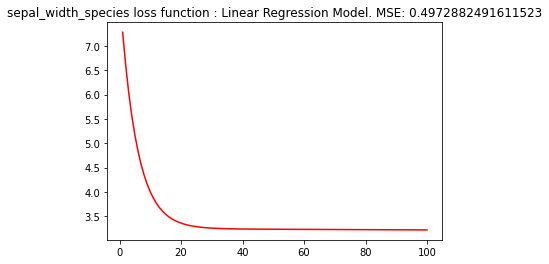

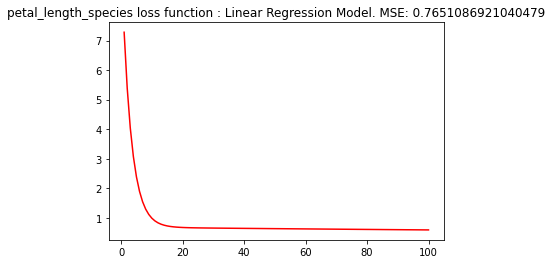

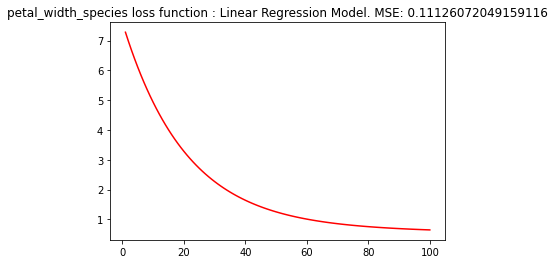

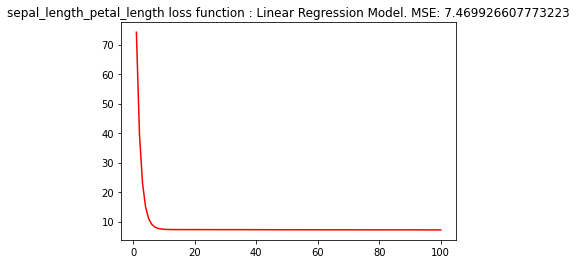

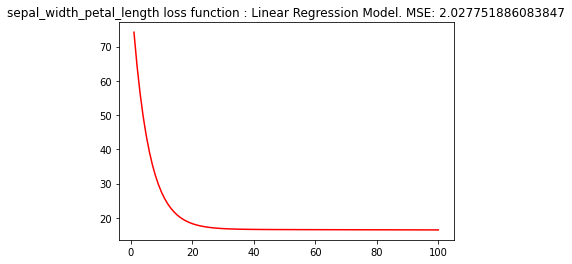

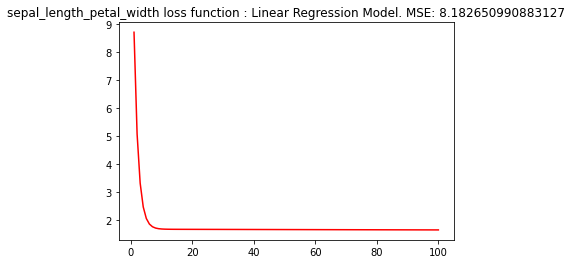

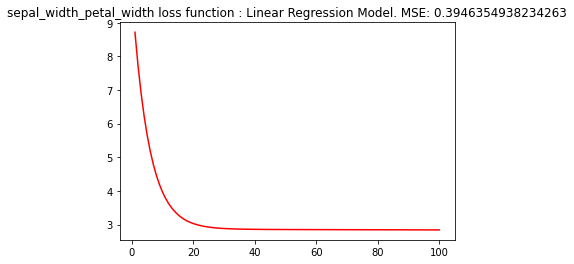

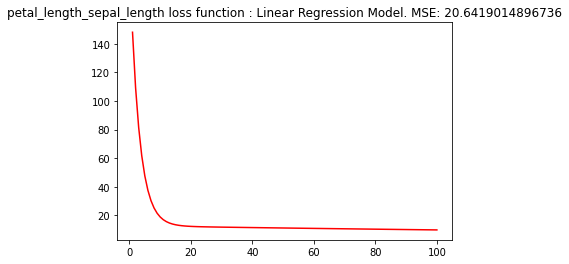

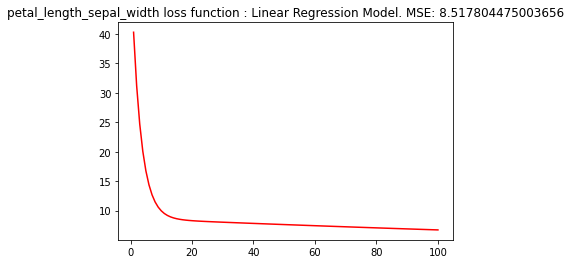

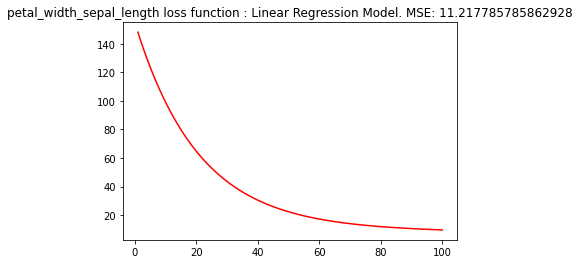

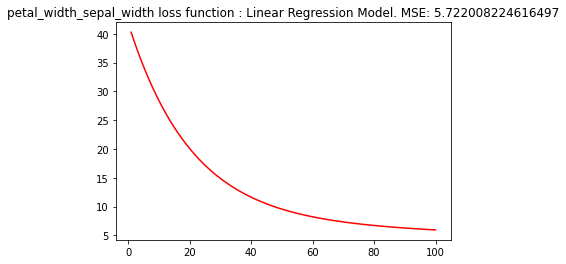

In [419]:
# features with indexes in the data to select the data and the variable to predict
model_mses = {}

features = {
    'sepal_length_species': (0, -1),
    'sepal_width_species': (1, -1),
    'petal_length_species': (2, -1),
    'petal_width_species': (3, -1),
    'sepal_length_petal_length': (0, 2),
    'sepal_width_petal_length': (1, 2),
    'sepal_length_petal_width': (0, 3),
    'sepal_width_petal_width': (1, 3),
    'petal_length_sepal_length': (2, 0),
    'petal_length_sepal_width': (2, 1),
    'petal_width_sepal_length': (3, 0),
    'petal_width_sepal_width': (3, 1)
}

saved_model = ''

for feature in features:
    X = data.iloc[:, features[feature][0]]
      
    # TODO: print accuracy based on species only models
    if features[feature][1] == -1:
        Y = data['species']
        Y = pd.Categorical(Y).codes
    else:
        Y = data.iloc[:, features[feature][1]]
        
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)

    model = LinearRegressionClassifier()
    model.fit(x_train, y_train)
    
    if (feature == 'sepal_length_species'):
        saved_model = model
        
    model_mse = mean_squared_error(y_test, y_pred)
    model_mses[feature] = model_mse
        
    y_pred = model.predict(x_test)
    plt.plot(model.current_loss_avg_by_step[0], model.current_loss_avg_by_step[1], color="red")
    plt.title('{} loss function : Linear Regression Model. MSE: {}'.format(feature, model_mse))
    plt.show()

Model sepal_length_species has slope: 0.19046705920839524 and bias: -0.02420627938605625
Model sepal_length_species with L2 regularization has slope: 0.19039709761492024 and bias: -0.024026846751661425



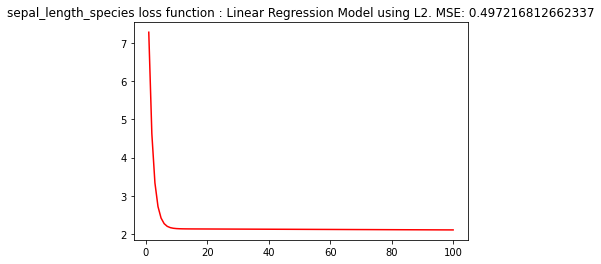

Model					MSE
sepal_length_species		0.497216812662337
sepal_width_species		0.4972882491611523
petal_length_species		0.7651086921040479
petal_width_species		0.11126072049159116
sepal_length_petal_length		7.469926607773223
sepal_width_petal_length		2.027751886083847
sepal_length_petal_width		8.182650990883127
sepal_width_petal_width		0.3946354938234263
petal_length_sepal_length		20.6419014896736
petal_length_sepal_width		8.517804475003656
petal_width_sepal_length		11.217785785862928
petal_width_sepal_width		5.722008224616497
sepal_length_species_l2		0.497216812662337


Model with the lowest MSE is : petal_width_species with MSE: 0.11126072049159116


In [510]:
current_feature = 'sepal_length_species'  # using sepal length to predict species

X = data.iloc[:, features[current_feature][0]]

if features[current_feature][1] == -1:
    Y = data['species']
    Y = pd.Categorical(Y).codes
else:
    Y = data.iloc[:, features[current_feature][1]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)

reg_model_l2 = LinearRegressionClassifier()
reg_model_l2.fit(x_train, y_train, use_l2_reg=True)

y_pred = reg_model_l2.predict(x_test)

model_mse = mean_squared_error(y_test, y_pred)
model_mses[current_feature + '_l2'] = model_mse

print("Model {} has slope: {} and bias: {}".format(current_feature, saved_model.slope, saved_model.bias))
print("Model {} with L2 regularization has slope: {} and bias: {}\n".format(current_feature, reg_model_l2.slope, reg_model_l2.bias))
plt.plot(reg_model_l2.current_loss_avg_by_step[0], reg_model_l2.current_loss_avg_by_step[1], color="red")
plt.title('{} loss function : Linear Regression Model using L2. MSE: {}'.format(current_feature, model_mse))
plt.show()

print('Model\t\t\t\t\tMSE')
lowest_mse = 99999999
model_with_lowest_mse = ''
for model in model_mses:
    if model_mses[model] < lowest_mse:
        lowest_mse = model_mses[model]
        model_with_lowest_mse = model
    print('{}\t\t{}'.format(model, model_mses[model]))

print('\n\nModel with the lowest MSE is : {} with MSE: {}'.format(model_with_lowest_mse, lowest_mse))
    

In [590]:
class LDAClassifier:
    
    def __init__(self):
        self.X = []
        self.Y = []
        self.W = -1

    def fit(self, X, y):
        num_classes = len(np.unique(y))
        input_feature_size = X.shape[1]
        
        ## Calculate the mean vectors for each of the classification classes
        mean_by_col_list = []
        for classification_class in range(1, num_classes + 1):
            mean_by_col_list.append(np.mean(X[y==classification_class], axis=0))

        ## Calculate the scatter matrix for every class
        sum_scatter_matrix = np.zeros((input_feature_size, input_feature_size))
        for classification_class, mean_by_col in zip([i for i in range(1, num_classes)], mean_by_col_list):
            classification_scatter_matrix = np.zeros((input_feature_size, input_feature_size))

            for row in X[y == classification_class]:
                reshaped_row, mean_by_class = row.reshape(input_feature_size, 1), mean_by_col.reshape(4, 1)
                result = (reshaped_row - mean_by_class).dot((reshaped_row - mean_by_class).T)
                classification_scatter_matrix += (reshaped_row - mean_by_class).dot((reshaped_row - mean_by_class).T)
            sum_scatter_matrix += classification_scatter_matrix

        ## Calculate overall mean & then find out between class scatter matrix
        overall_mean = np.mean(X, axis=0)
        reshaped_overall_mean = overall_mean.reshape(input_feature_size, 1)
        scatter_between_class = np.zeros((input_feature_size, input_feature_size))
        for index, mean_by_col in enumerate(mean_by_col_list):
            n = X[y == index + 1, :].shape[0]
            reshaped_mean_by_col = mean_by_col.reshape(input_feature_size, 1)
            scatter_between_class += n * (reshaped_mean_by_col - reshaped_overall_mean).dot((reshaped_mean_by_col - reshaped_overall_mean).T) 

        eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(sum_scatter_matrix).dot(scatter_between_class)) 
        eigen_pairs = sorted([(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))], key=lambda k: k[0], reverse=True)
        eigen_vector_sum = sum(eigen_values)
       
        ## Find dimensionality reducing matrix
        W = np.hstack((eigen_pairs[0][1].reshape(input_feature_size, 1), eigen_pairs[1][1].reshape(input_feature_size, 1)))
        self.W = W
        self.X = X.dot(W)
        self.Y = y
        
    def predict(self, X):
        X_lda_pred = X.dot(self.W)

        # now to find Y_pred, we can use euclidean distance
        classification_y_pred = []
        for vec in X_lda_pred:
            euclidean_distance_vec = np.linalg.norm(self.X - vec, axis=1)            
            index_with_least_distance = np.unravel_index(euclidean_distance_vec.argmin(), euclidean_distance_vec.shape)
            classification_y_pred.append(self.Y[index_with_least_distance])

        return np.array(classification_y_pred)

In [591]:
# Prepare the data for classification (X is everything but the classification & Y is the list of classifications)
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)
# encoding needs to be done manually for now
encoder = LabelEncoder()
label_encoder = encoder.fit(y_train)
y_train = label_encoder.transform(y_train) + 1

model = LDAClassifier()
model.fit(x_train.to_numpy(), y_train)
y_pred = model.predict(x_test.to_numpy())

# convert predicted labels into a form understood by accuracy score interpretation method
label_encoder = encoder.fit(y_test)
y_test = label_encoder.transform(y_test) + 1

print('Accuracy score for LDAClassifier: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score for LDAClassifier: 1.0


In [686]:
class LogisticRegressionClassifier:
    
    def __init__(self):
        self.theta = -1
        self.num_classes = -1
    
    def hypothesis(self, theta, X):
        return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001
        
    def gradient_descent(self, X, y, theta, reg_alpha, epochs, num_classes):
        m = len(X)
        for i in range(0, epochs):
            if i % 50 == 0:
                print('Running gradient descent for epoch: ' + str(i))
            for j in range(0, num_classes):
                theta = pd.DataFrame(theta)
                h = self.hypothesis(theta.iloc[:,j], X)
                for k in range(0, theta.shape[0]):
                    theta.iloc[k, j] -= (reg_alpha / m) * np.sum((h - y.iloc[:, j]) * X.iloc[:, k])
                theta = pd.DataFrame(theta)
                
        return theta
        
    def fit(self, X, y, num_epochs=100, reg_alpha=0.02):
        
        X_with_bias = pd.DataFrame(np.append(X, np.ones([len(X), 1]), 1))
        num_classes = len(np.unique(y))
        self.num_classes = num_classes

        # have to create a matrix for something similar to one hot encoding
        # since X & y will have the same number of rows
        y1 = np.zeros([y.shape[0], num_classes])
        y1 = pd.DataFrame(y1)
        for i in range(0, num_classes):
            for j in range(0, len(y1)):
                if y[j] == np.unique(y)[i]:
                    y1.iloc[j, i] = 1
                else: 
                    y1.iloc[j, i] = 0
        
        theta = np.zeros([X_with_bias.shape[1], y1.shape[1]])
        theta = self.gradient_descent(X_with_bias, y1, theta, reg_alpha, num_epochs, num_classes)
        self.theta = theta

        
    def predict(self, X):
        # add a bias parameter
        X_with_bias = pd.DataFrame(np.append(X, np.ones([len(X), 1]), 1))

        output = []
        for i in range(0, self.num_classes):
            theta1 = pd.DataFrame(self.theta)
            h = self.hypothesis(theta1.iloc[:,i], X_with_bias)
            output.append(h)
        output = pd.DataFrame(np.asarray(output).T)
        output_nparr = np.asarray(output).argmax(axis=1) + 1
        return output_nparr
        


In [687]:
# Prepare the data for classification (X is everything but the classification & Y is the list of classifications)
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)
# encoding needs to be done manually for now
encoder = LabelEncoder()
label_encoder = encoder.fit(y_train)
y_train = label_encoder.transform(y_train) + 1

model = LogisticRegressionClassifier()
model.fit(x_train.to_numpy(), y_train)
y_pred = model.predict(x_test.to_numpy())

# convert predicted labels into a form understood by accuracy score interpretation method
label_encoder = encoder.fit(y_test)
y_test = label_encoder.transform(y_test) + 1

print('Accuracy score for LogisticRegressionClassifier: {}'.format(accuracy_score(y_test, y_pred)))

Running gradient descent for epoch: 0
Running gradient descent for epoch: 50
Accuracy score for LogisticRegressionClassifier: 0.6666666666666666


In [688]:
import random

class NaiveBayesClassifier:
    
    def __init__(self):
        self.nba = {}
        self.num_classes = -1
        self.num_input_features = -1
        self.mean = -1
        self.variance = -1
        self.priors = -1
        self.classification_labels = []
    
    def posterior_prob(self, X_row, mean, variance, classification_labels, n_cols):
        posterior_probabilities = []
        for i in range(classification_labels):
            posterior = 0

            for j in range(n_cols):
                posterior += np.log(self.calculate_probability_density(mean[i][j], variance[i][j], X_row[j]))
            posterior_probabilities.append(posterior)

        return posterior_probabilities
    
    def calculate_probability_density(self, mean, variance, X):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp( (-(X - mean)**2) / (2 * variance))

    def fit(self, X):
        self.num_input_features = len(X.columns) - 1
        self.classification_labels = X['species'].unique()
        self.num_classes = len(self.classification_labels)
        self.mean = X.groupby(by = 'species').apply(lambda x: x.mean(axis = 0)).values
        self.variance = X.groupby(by = 'species').apply(lambda x: x.var(axis = 0)).values
        self.priors = np.log(X.groupby(by = 'species').apply(lambda x: len(x)/len(X))).values


    def predict(self, X):
        predictions = []
        for row in range(X.shape[0]):
            posterior = self.posterior_prob(
                X.iloc[row, :-1], self.mean, self.variance, self.num_classes, self.num_input_features
            )
            predictions.append(self.classification_labels[np.argmax(self.priors + posterior)])

        return predictions


In [689]:
model = NaiveBayesClassifier()

random.seed(3)
indices_for_test_dataframe = random.sample(population=df.index.tolist(), k=round(0.1 * len(data)))
test_dataframe = data.loc[indices_for_test_dataframe]
training_dataframe = data.drop(indices_for_test_dataframe)
        
model.fit(training_dataframe)
y_pred = model.predict(test_dataframe)

print('Accuracy score for NaiveBayesClassifier: {}'.format(accuracy_score(test_df.iloc[:,-1], y_pred)))

Accuracy score for NaiveBayesClassifier: 0.2


C:\Users\pravu\AppData\Local\Temp\ipykernel_22100\3016691815.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  self.mean = X.groupby(by = 'species').apply(lambda x: x.mean(axis = 0)).values
C:\Users\pravu\AppData\Local\Temp\ipykernel_22100\3016691815.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  self.variance = X.groupby(by = 'species').apply(lambda x: x.var(axis = 0)).values
